In [3]:
import glob
import nltk
from collections import Counter
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
word_list=nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(word_list)
#lambda function to remove stopwords from the list
filtered_words = filter(lambda token: token not in stopwords.words('english'), tokens)
for filename in glob.iglob('C:/Users/ABC/AppData/Roaming/nltk_data/corpora/gutenberg/**/*.txt', recursive=True):
    if 'hamlet' in filename:
        f = open(filename, 'r')
        content = f.read().split()
        fdist = Counter(content)
        print(dict(fdist))
  
           

{'defend': 2, 'Yases,': 1, 'minde,': 2, 'nickname': 1, 'Playing,': 2, 'reckoning': 1, 'Satyre:': 1, 'Prologue.': 1, 'there?': 4, 'world?': 1, 'others': 2, 'Faith': 4, "soil'd": 1, 'Like': 7, 'gone:': 1, 'peruse': 1, 'vp': 24, 'Serpent': 2, 'Rage,': 1, 'Now': 22, 'foule': 10, 'seeing': 3, 'Came': 1, 'Hecats': 1, 'Ore-beares': 1, 'Powers,': 1, 'other,': 4, 'likely': 1, 'daintier': 1, 'Reuolution,': 1, 'sober,': 1, 'worke': 4, 'Fire:': 1, 'Tush,': 1, 'Gonzago?': 1, "tan'd": 1, "belou'd,": 1, 'Father?': 3, 'foresaid': 1, 'griefe': 1, 'thicker': 1, 'monstrous': 1, 'now': 46, '(my': 2, 'Matine': 1, 'one:': 2, 'chance': 1, 'lightest': 1, 'Ghost,': 2, "suck'd": 1, 'Loue,': 9, 'holds,': 1, 'Amber,': 1, 'Virgin': 1, 'tremble': 2, 'blessing,': 1, 'impart': 4, 'vsuall': 1, 'mute': 1, 'Pastorall:': 1, 'Perhaps': 1, 'Woodcocks.': 1, 'but': 145, "frown'd": 1, 'mount': 1, 'faith:': 1, 'doest': 1, 'enough.': 1, 'talke': 2, 'Husband': 4, 'o,': 4, 'beyond': 2, 'life.': 1, 'Beggers': 2, 'conueyance': 1, '

In [5]:
#code snippet to write the content in csv file

import csv
import operator

rank_dict={}
for k, v in dict(fdist).items():
    rank_dict[v] = rank_dict.get(v, [])
    rank_dict[v].append(k)

sorted_rank_dict=sorted(rank_dict.items(),key=operator.itemgetter(0),reverse=True)
rank_hash_set={}

count=0
for x in sorted_rank_dict:
    count=count+1;
    rank_hash_set[count]=x;
    

with open('C:/Users/ABC/Desktop/frequency.csv', 'w') as csvfile:
    fieldnames = ['Rank', 'Frequency', 'Word']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for k,v in rank_hash_set.items():
        value=v
        for word in value[1]:
            writer.writerow({'Rank': k, 'Frequency': value[0],'Word':word})
        
   

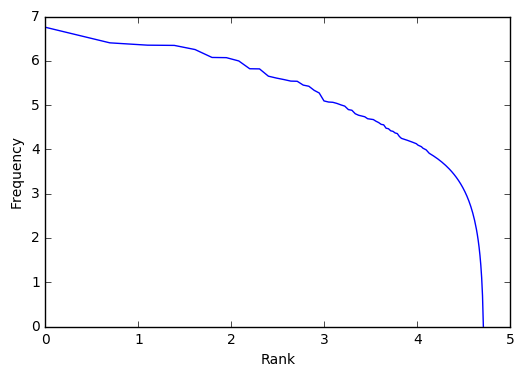

In [1]:
#using matplotlib to generate chart 
from csv import DictReader
import matplotlib.pyplot as plt
import math
with open("C:/Users/ABC/Desktop/frequency.csv") as file_read:
    log_rank = [math.log(float(row["Rank"])) for row in DictReader(file_read)]

with open("C:/Users/ABC/Desktop/frequency.csv") as file_read:
    log_freq = [math.log(float(row["Frequency"])) for row in DictReader(file_read)]
    

plt.plot(log_rank, log_freq)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()